# Step 1: Load and Inspect Data

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from datetime import datetime

### Load the datasets

In [2]:
fraud_data = pd.read_csv("../data/Fraud_Data.csv")
ip_data = pd.read_csv("../data/IpAddress_to_Country.csv")
credit_data = pd.read_csv("../data/creditcard.csv")

### Check the structure of the datasets

In [71]:
print("Fraud-Data")
print(fraud_data.info())
print(fraud_data.describe())
print(fraud_data.head())

Fraud-Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       0 non-null      int64         
 1   signup_time                   0 non-null      datetime64[ns]
 2   purchase_time                 0 non-null      datetime64[ns]
 3   purchase_value                0 non-null      float64       
 4   device_id                     0 non-null      object        
 5   source                        0 non-null      object        
 6   browser                       0 non-null      object        
 7   sex                           0 non-null      object        
 8   age                           0 non-null      int64         
 9   ip_address                    0 non-null      object        
 10  class                         0 non-null      int64         
 11  ip_int                        0 n

In [8]:
print("Ip-Address")
print(ip_data.info())
print(ip_data.head())


Ip-Address
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None
   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China
Credit-Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --

In [9]:

print("Credit-Data")
print(credit_data.info())
print(credit_data.describe())
print(credit_data.head())

Credit-Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21

### Check for missing values

In [10]:
print(fraud_data.isnull().sum())
print(ip_data.isnull().sum())
print(credit_data.isnull().sum())

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Step 2: Handle Missing Values

In [11]:
fraud_data.fillna({'browser': fraud_data['browser'].mode()[0]}, inplace=True)
fraud_data.fillna({'age': fraud_data['age'].median()}, inplace=True)
credit_data.fillna(credit_data.median(), inplace=True)

# Step 3: Data Cleaning

### Remove duplicates

In [12]:
fraud_data.drop_duplicates(inplace=True)
credit_data.drop_duplicates(inplace=True)

### Convert data types (e.g., timestamps)

In [13]:
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Step 4: Exploratory Data Analysis (EDA)

### Univariate Analysis (Visualize distribution of individual variables)

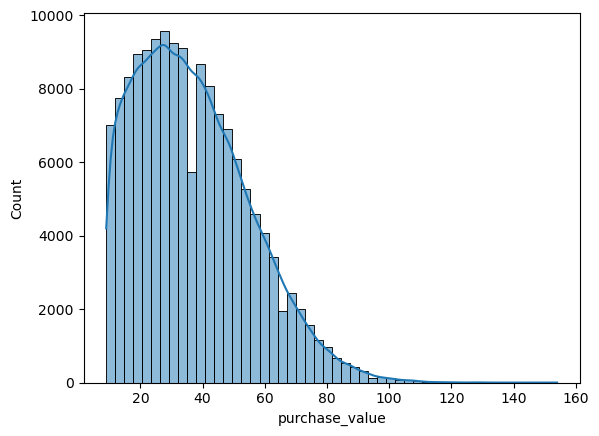

In [14]:
sns.histplot(fraud_data['purchase_value'], bins=50, kde=True)
plt.show()

### Bivariate Analysis (Compare fraudulent vs. non-fraudulent transactions)

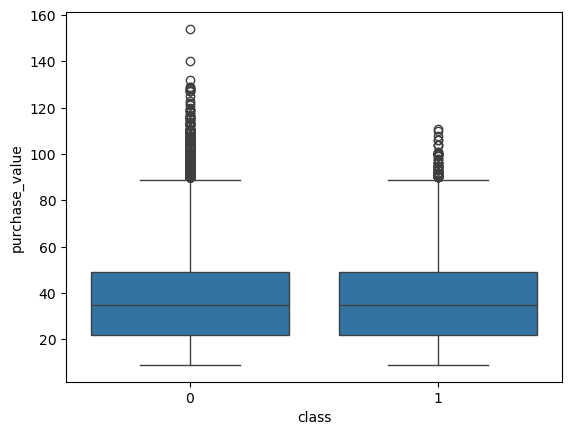

In [15]:
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.show()

### Correlation Heatmap

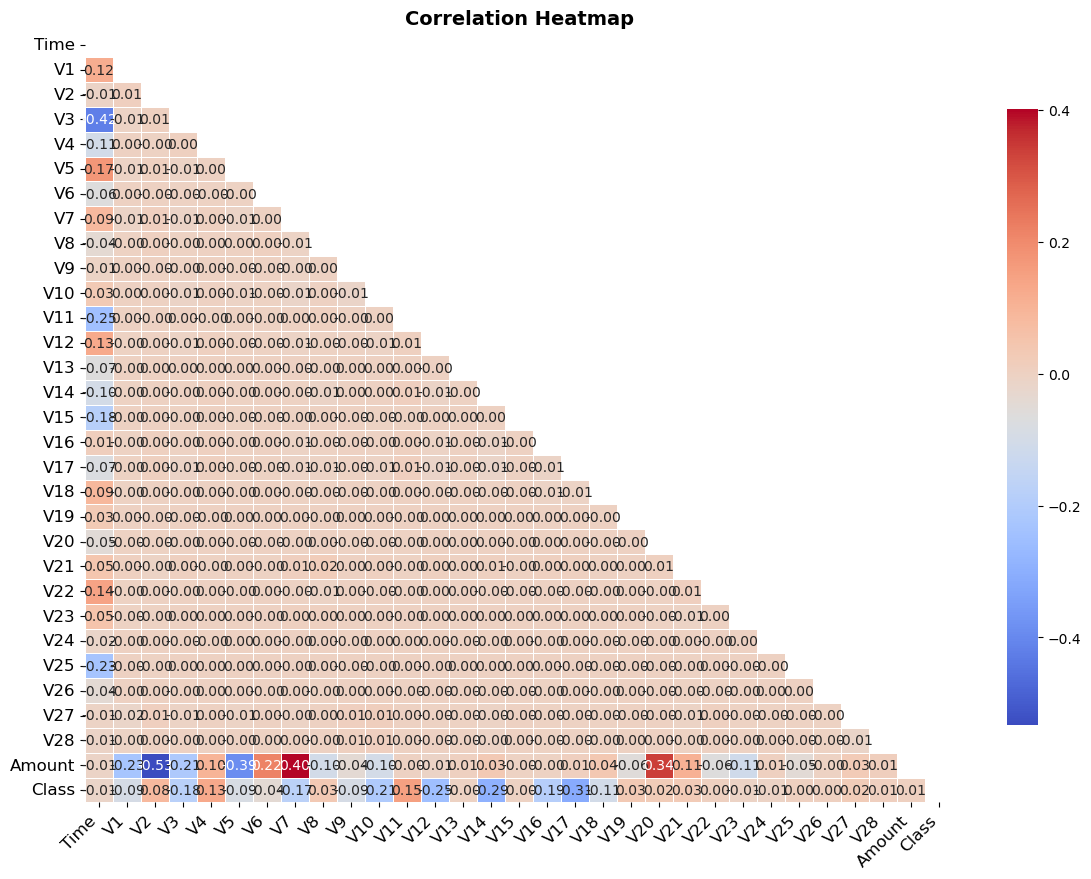

In [18]:
# Compute correlation and mask upper triangle
corr = credit_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, 
            cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})
plt.xticks(rotation=45, ha="right", fontsize=12), plt.yticks(fontsize=12)
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

# Step 5: Merge Datasets for Geolocation Analysis

### Convert IP addresses to integer format

In [20]:
import ipaddress
import pandas as pd

def ip_to_int(ip):
    try:
        return int(ipaddress.IPv4Address(ip))
    except (ipaddress.AddressValueError, ValueError, TypeError):
        return None  # Return None for invalid IPs

# Convert column to string to prevent type issues
fraud_data["ip_address"] = fraud_data["ip_address"].astype(str)

# Apply function safely
fraud_data["ip_int"] = fraud_data["ip_address"].apply(ip_to_int)

# Drop rows with invalid IPs (optional)
fraud_data = fraud_data.dropna(subset=["ip_int"])

In [21]:
import ipaddress

def ip_to_int(ip):
    return int(ipaddress.IPv4Address(ip))

fraud_data['ip_int'] = fraud_data['ip_address'].apply(ip_to_int)

### Merge with IpAddress_to_Country.csv

In [22]:
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].astype(int)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].astype(int)

fraud_data = fraud_data.merge(ip_data, how='left', 
                              left_on='ip_int', 
                              right_on='lower_bound_ip_address')

### Step 6: Feature Engineering

### Transaction frequency and velocity (Fraud_Data.csv)

In [23]:
fraud_data['transaction_count_per_user'] = fraud_data.groupby('user_id')['user_id'].transform('count')
fraud_data['transaction_count_per_device'] = fraud_data.groupby('device_id')['device_id'].transform('count')

### Time-Based Features

In [24]:
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

# Step 7: Normalize and Scale Numerical Features

### Use MinMaxScaler for scaling purchase values

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Check for missing values in 'purchase_value' column
if fraud_data['purchase_value'].isnull().any():
    # Option 1: Fill missing values with a default value (e.g., mean)
    fraud_data['purchase_value'].fillna(fraud_data['purchase_value'].mean(), inplace=True)
    # Option 2: Or drop rows with missing values
    # fraud_data = fraud_data.dropna(subset=['purchase_value'])

# Apply MinMax scaling after handling missing values
scaler = MinMaxScaler()
fraud_data['purchase_value_scaled'] = scaler.fit_transform(fraud_data[['purchase_value']])

# Verify the result
print(fraud_data[['purchase_value', 'purchase_value_scaled']].head())

   purchase_value  purchase_value_scaled
0              34               0.172414
1              16               0.048276
2              15               0.041379
3              44               0.241379
4              39               0.206897


In [75]:
scaler = MinMaxScaler()
fraud_data['purchase_value_scaled'] = scaler.fit_transform(fraud_data[['purchase_value']])

### Standardize Amount in creditcard.csv

In [76]:
credit_data['Amount'] = StandardScaler().fit_transform(credit_data[['Amount']])

### Step 8: Encode Categorical Features

In [79]:
label_enc = LabelEncoder()

fraud_data['browser'] = label_enc.fit_transform(fraud_data['browser'])
fraud_data['source'] = label_enc.fit_transform(fraud_data['source'])
fraud_data['sex'] = label_enc.fit_transform(fraud_data['sex'])

### Final Step: Save Preprocessed Data

In [80]:
fraud_data.to_csv("fraud_data_preprocessed.csv", index=False)
credit_data.to_csv("credit_data_preprocessed.csv", index=False)